<h3>Task1</h3>

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.feature import blob_log, blob_dog, hog
from skimage import color, exposure

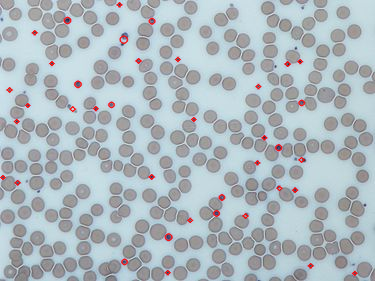

In [ ]:
import cv2
import numpy as np
from google.colab import files
from google.colab.patches import cv2_imshow

image_path = "/content/375px-Platelets2.jpeg"
img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

if img is None:
    print(f"Error: Could not load image at {image_path}")
else:
    params = cv2.SimpleBlobDetector_Params()
    params.filterByArea = True
    params.minArea = 10
    params.maxArea = 100

    params.filterByCircularity = True
    params.minCircularity = 0.5

    params.filterByConvexity = True
    params.minConvexity = 0.8

    params.filterByInertia = True
    params.minInertiaRatio = 0.6

    params.filterByColor = True
    params.blobColor = 0

    detector = cv2.SimpleBlobDetector_create(params)
    keypoints = detector.detect(img)

    img_color = cv2.imread(image_path)
    img_with_blobs = cv2.drawKeypoints(img_color, keypoints, np.array([]), (0, 0, 255), cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

    cv2_imshow(img_with_blobs)

In [ ]:
import cv2
import numpy as np
from skimage.feature import blob_dog, blob_log, blob_doh
from google.colab.patches import cv2_imshow

image_path = "/content/375px-Platelets2.jpeg"
im = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

if im is None:
    print("Error: Could not load image")

<h3>LOG</h3>

LoG Blob Detection


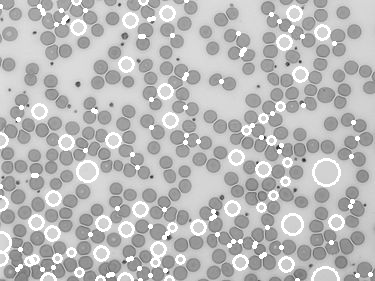

In [ ]:
log_blobs = blob_log(im, max_sigma=30, num_sigma=10, threshold=.1)

im_log = im.copy()

for blob in log_blobs:
    y, x, r = blob
    cv2.circle(im_log, (int(x), int(y)), int(r), (255, 0, 0), 2)

print("LoG Blob Detection")
cv2_imshow(im_log)

<h3>DOG</h3>

DoG Blob Detection


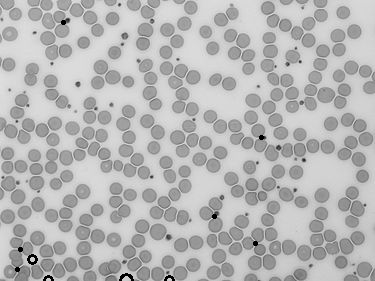

In [ ]:
dog_blobs = blob_dog(im, max_sigma=30, threshold=.1)

im_dog = im.copy()

for blob in dog_blobs:
    y, x, r = blob
    cv2.circle(im_dog, (int(x), int(y)), int(r), (0, 255, 0), 2)

print("DoG Blob Detection")
cv2_imshow(im_dog)

<h3>HOG</h3>

Edge Detection (for HoG representation)


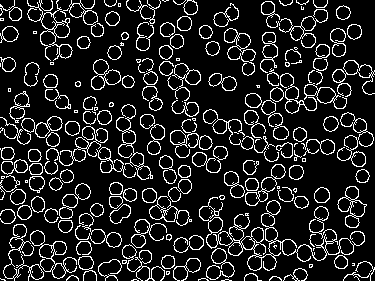

In [ ]:
edges = cv2.Canny(im, 100, 200)

print("Edge Detection (for HoG representation)")
cv2_imshow(edges)

LoG Blob Detection (Purple)


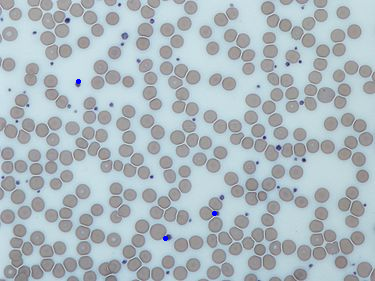

DoG Blob Detection (Purple)


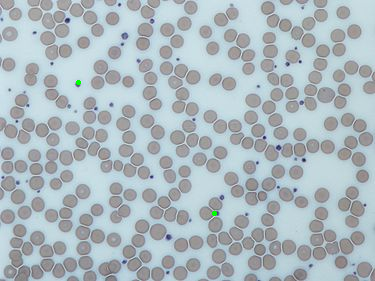

Edge Detection (for HoG - Purple Emphasis)


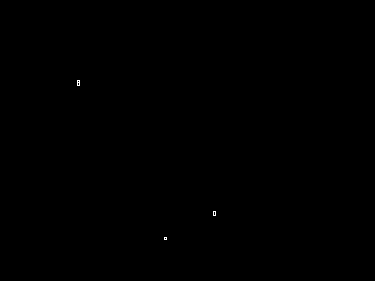

In [ ]:
import cv2
import numpy as np
from skimage.feature import blob_dog, blob_log
from google.colab.patches import cv2_imshow

image_path = "/content/375px-Platelets2.jpeg"
img = cv2.imread(image_path)

if img is None:
    print("Error: Could not load image")
else:
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    lower_purple = np.array([120, 50, 50])
    upper_purple = np.array([150, 255, 255])
    mask = cv2.inRange(hsv, lower_purple, upper_purple)
    filtered_img = cv2.bitwise_and(img, img, mask=mask)
    gray_filtered = cv2.cvtColor(filtered_img, cv2.COLOR_BGR2GRAY)

    log_blobs = blob_log(gray_filtered, max_sigma=20, num_sigma=10, threshold=.1)

    im_log = img.copy()
    for blob in log_blobs:
        y, x, r = blob
        cv2.circle(im_log, (int(x), int(y)), int(r), (255, 0, 0), 2)

    print("LoG Blob Detection (Purple)")
    cv2_imshow(im_log)

    dog_blobs = blob_dog(gray_filtered, max_sigma=20, threshold=.1)

    im_dog = img.copy()
    for blob in dog_blobs:
        y, x, r = blob
        cv2.circle(im_dog, (int(x), int(y)), int(r), (0, 255, 0), 2)

    print("DoG Blob Detection (Purple)")
    cv2_imshow(im_dog)

    edges = cv2.Canny(gray_filtered, 100, 200)

    print("Edge Detection (for HoG - Purple Emphasis)")
    cv2_imshow(edges)

LOG


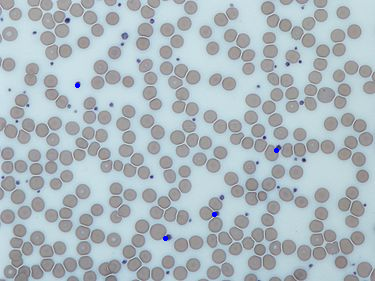

DOG


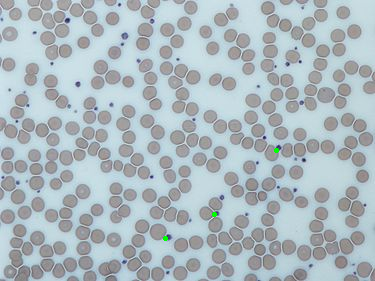

HOG


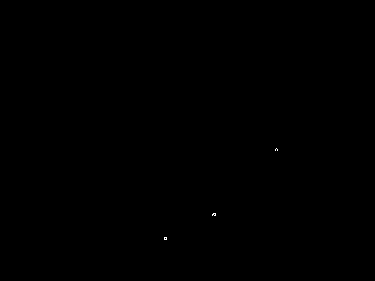

In [ ]:
import cv2
import numpy as np
from skimage.feature import blob_log, blob_dog
from google.colab.patches import cv2_imshow

image_path = "/content/375px-Platelets2.jpeg"
img = cv2.imread(image_path)

if img is None:
    print("Error: Could not load image")
else:
    img_blur = cv2.medianBlur(img, 3)
    hsv = cv2.cvtColor(img_blur, cv2.COLOR_BGR2HSV)
    lower_purple = np.array([120, 40, 40])
    upper_purple = np.array([160, 255, 255])
    mask = cv2.inRange(hsv, lower_purple, upper_purple)
    filtered_img = cv2.bitwise_and(img_blur, img_blur, mask=mask)
    gray_filtered = cv2.cvtColor(filtered_img, cv2.COLOR_BGR2GRAY)
    gray_equalized = cv2.equalizeHist(gray_filtered)

    print("LOG")
    log_blobs = blob_log(gray_equalized, max_sigma=15, num_sigma=10, threshold=.08)
    im_log = img.copy()
    for blob in log_blobs:
        y, x, r = blob
        cv2.circle(im_log, (int(x), int(y)), int(r), (255, 0, 0), 2)
    cv2_imshow(im_log)

    print("DOG")
    dog_blobs = blob_dog(gray_equalized, max_sigma=15, threshold=.08)
    im_dog = img.copy()
    for blob in dog_blobs:
        y, x, r = blob
        cv2.circle(im_dog, (int(x), int(y)), int(r), (0, 255, 0), 2)
    cv2_imshow(im_dog)

    print("HOG")
    edges = cv2.Canny(gray_equalized, 150, 250)
    cv2_imshow(edges)

<h3>Candy image. How many candies are present ? </h3>

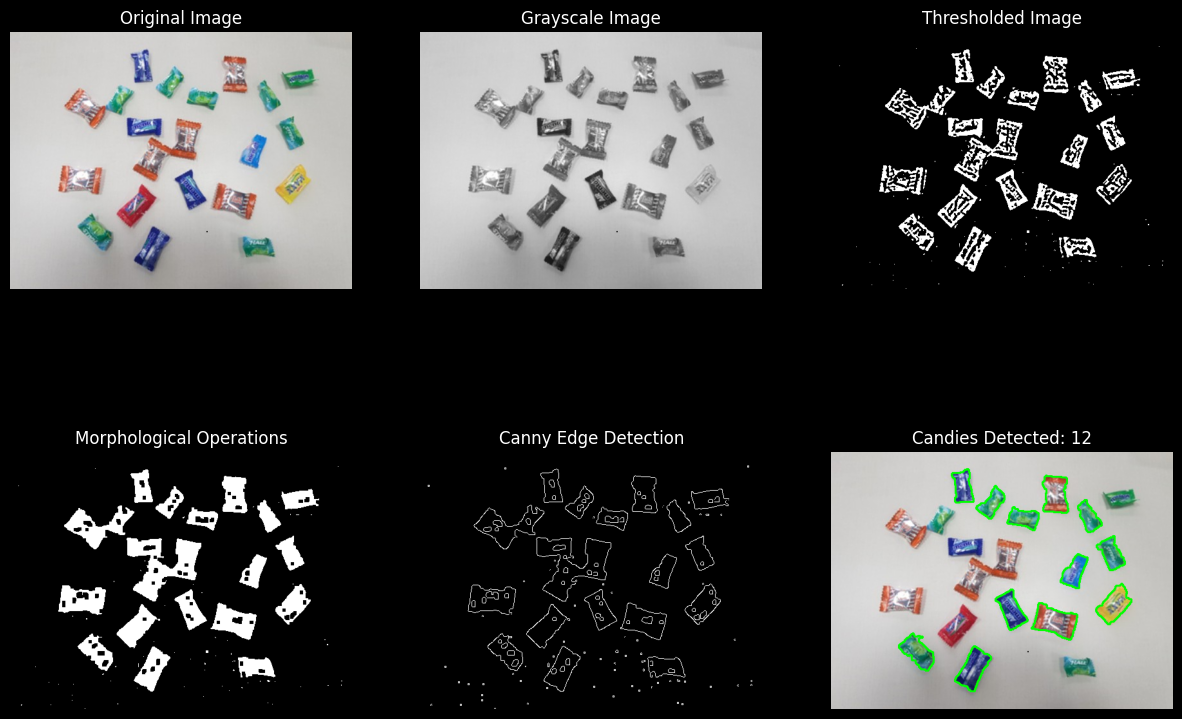

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image_path = "/content/candy.jpg"
candy_img = cv2.imread(image_path)

if candy_img is None:
    print("Error: Could not read the image. Please check the file path.")
else:
    gray = cv2.cvtColor(candy_img, cv2.COLOR_BGR2GRAY)
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)
    thresh = cv2.adaptiveThreshold(blurred, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 11, 2)

    kernel = np.ones((3, 3), np.uint8)
    morph = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel, iterations=2)

    edges = cv2.Canny(morph, 50, 150)
    contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    min_candy_area = 500
    max_candy_area = 10000
    candy_contours = [cnt for cnt in contours if min_candy_area < cv2.contourArea(cnt) < max_candy_area]

    candy_count = len(candy_contours)
    candy_img_copy = candy_img.copy()
    cv2.drawContours(candy_img_copy, candy_contours, -1, (0, 255, 0), 2)

    fig, axs = plt.subplots(2, 3, figsize=(15, 10))

    axs[0, 0].imshow(cv2.cvtColor(candy_img, cv2.COLOR_BGR2RGB))
    axs[0, 0].set_title("Original Image")
    axs[0, 0].axis("off")

    axs[0, 1].imshow(gray, cmap="gray")
    axs[0, 1].set_title("Grayscale Image")
    axs[0, 1].axis("off")

    axs[0, 2].imshow(thresh, cmap="gray")
    axs[0, 2].set_title("Thresholded Image")
    axs[0, 2].axis("off")

    axs[1, 0].imshow(morph, cmap="gray")
    axs[1, 0].set_title("Morphological Operations")
    axs[1, 0].axis("off")

    axs[1, 1].imshow(edges, cmap="gray")
    axs[1, 1].set_title("Canny Edge Detection")
    axs[1, 1].axis("off")

    axs[1, 2].imshow(cv2.cvtColor(candy_img_copy, cv2.COLOR_BGR2RGB))
    axs[1, 2].set_title(f"Candies Detected: {candy_count}")
    axs[1, 2].axis("off")

    plt.show()


<h3>Satellite images</h3>

Original Grayscale Image


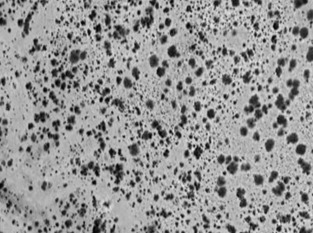

Blurred Image


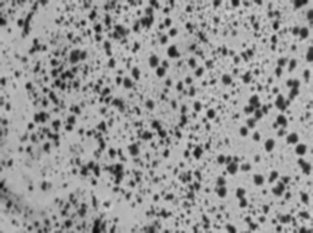

Equalized Image


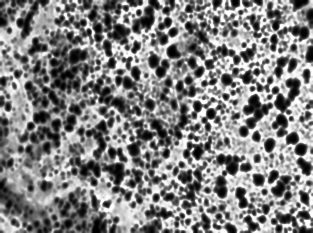

Thresholded Image


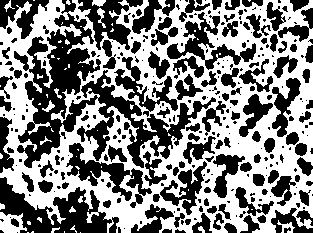

Image with Blobs


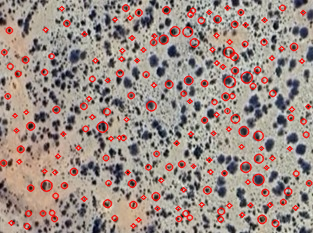

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

image_path = "/content/MoonCrest1.jpg"

img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

if img is None:
    print(f"Error: Could not load image at {image_path}")
else:
    print("Original Grayscale Image")
    cv2_imshow(img)

    blurred = cv2.GaussianBlur(img, (5, 5), 0)
    print("Blurred Image")
    cv2_imshow(blurred)

    equalized = cv2.equalizeHist(blurred)
    print("Equalized Image")
    cv2_imshow(equalized)

    _, thresh = cv2.threshold(equalized, 127, 255, cv2.THRESH_BINARY)
    print("Thresholded Image")
    cv2_imshow(thresh)

    params = cv2.SimpleBlobDetector_Params()
    params.filterByArea = True
    params.minArea = 10
    params.maxArea = 100

    params.filterByCircularity = True
    params.minCircularity = 0.5

    params.filterByConvexity = True
    params.minConvexity = 0.8

    params.filterByInertia = True
    params.minInertiaRatio = 0.6

    params.filterByColor = True
    params.blobColor = 0

    detector = cv2.SimpleBlobDetector_create(params)
    keypoints = detector.detect(equalized)

    img_color = cv2.imread(image_path)
    img_with_blobs = cv2.drawKeypoints(img_color, keypoints, img_color.copy(), (0, 0, 255), cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
    print("Image with Blobs")
    cv2_imshow(img_with_blobs)

Original Image (Color)


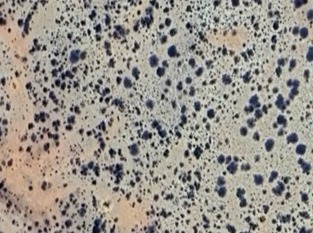

Grayscale Image


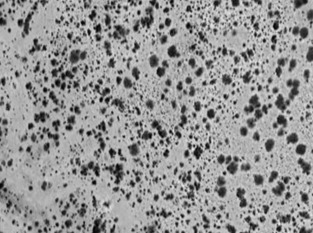

Blurred Image


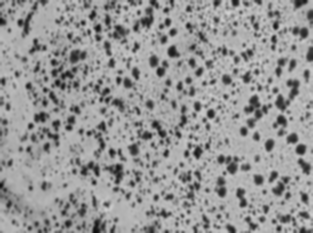

Equalized Image


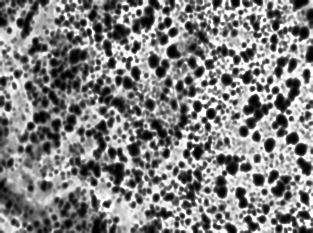

Thresholded Image


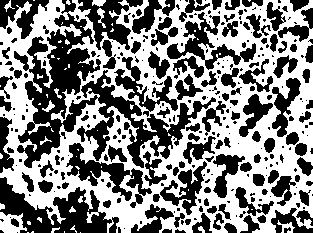

Image with Blobs


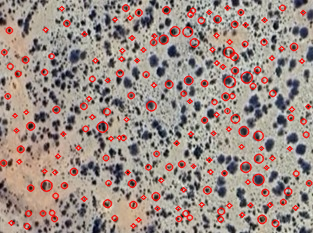

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

image_path = "/content/MoonCrest2.jpg"

img = cv2.imread(image_path)

if img is None:
    print(f"Error: Could not load image at {image_path}")
else:
    print("Original Image (Color)")
    cv2_imshow(img)

    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    print("Grayscale Image")
    cv2_imshow(gray)

    blurred = cv2.GaussianBlur(gray, (5, 5), 0)
    print("Blurred Image")
    cv2_imshow(blurred)

    equalized = cv2.equalizeHist(blurred)
    print("Equalized Image")
    cv2_imshow(equalized)

    _, thresh = cv2.threshold(equalized, 127, 255, cv2.THRESH_BINARY)
    print("Thresholded Image")
    cv2_imshow(thresh)

    params = cv2.SimpleBlobDetector_Params()
    params.filterByArea = True
    params.minArea = 10
    params.maxArea = 100

    params.filterByCircularity = True
    params.minCircularity = 0.5

    params.filterByConvexity = True
    params.minConvexity = 0.8

    params.filterByInertia = True
    params.minInertiaRatio = 0.6

    params.filterByColor = True
    params.blobColor = 0

    detector = cv2.SimpleBlobDetector_create(params)
    keypoints = detector.detect(equalized)

    img_with_blobs = cv2.drawKeypoints(img.copy(), keypoints, None, (0, 0, 255),
                                       cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
    print("Image with Blobs")
    cv2_imshow(img_with_blobs)

<h3>Task 2</h3>

In [ ]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
import keras
import time
import matplotlib.image as mpimg
from mpl_toolkits.mplot3d import Axes3D
from IPython.display import HTML
from matplotlib.animation import FuncAnimation
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, BatchNormalization
from tensorflow.keras.utils import to_categorical, plot_model
from tensorflow.keras.applications import VGG16
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l1, l2
from tensorflow.keras import layers, models, applications, optimizers
from tensorflow.keras.datasets import cifar10, cifar100, mnist, fashion_mnist
from tensorflow.image import resize

from tensorflow.python.profiler.model_analyzer import profile
from tensorflow.python.profiler.option_builder import ProfileOptionBuilder

plt.style.use('dark_background')


<h3>VGG16</h3>

In [ ]:
(X_train, y_train), (X_test, y_test) = cifar100.load_data()
X_train, X_test = X_train.astype('float32') / 255.0, X_test.astype('float32') / 255.0
y_train, y_test = to_categorical(y_train, 100), to_categorical(y_test, 100)

In [ ]:
base_model = applications.VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))
for layer in base_model.layers[-4:]:
    layer.trainable = True

In [ ]:
model = models.Sequential([
    base_model,
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

In [ ]:
model = models.Sequential([
    base_model,
    layers.Flatten(),
    layers.Dense(512, activation='relu', kernel_regularizer=keras.regularizers.l2(0.0005)),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(100, activation='softmax')
])
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)                   │ (None, 1, 1, 512)           │      14,714,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 512)                 │         262,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 100)                 │          51,300 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 15,030,692 (57.34 MB)

 Trainable params: 15,029,668 (57.33 MB)

 Non-trainable params: 1,024 (4.00 KB)

In [ ]:
model.compile(optimizer=SGD(learning_rate=0.001, momentum=0.9),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

<Figure size 1000x1000 with 0 Axes>

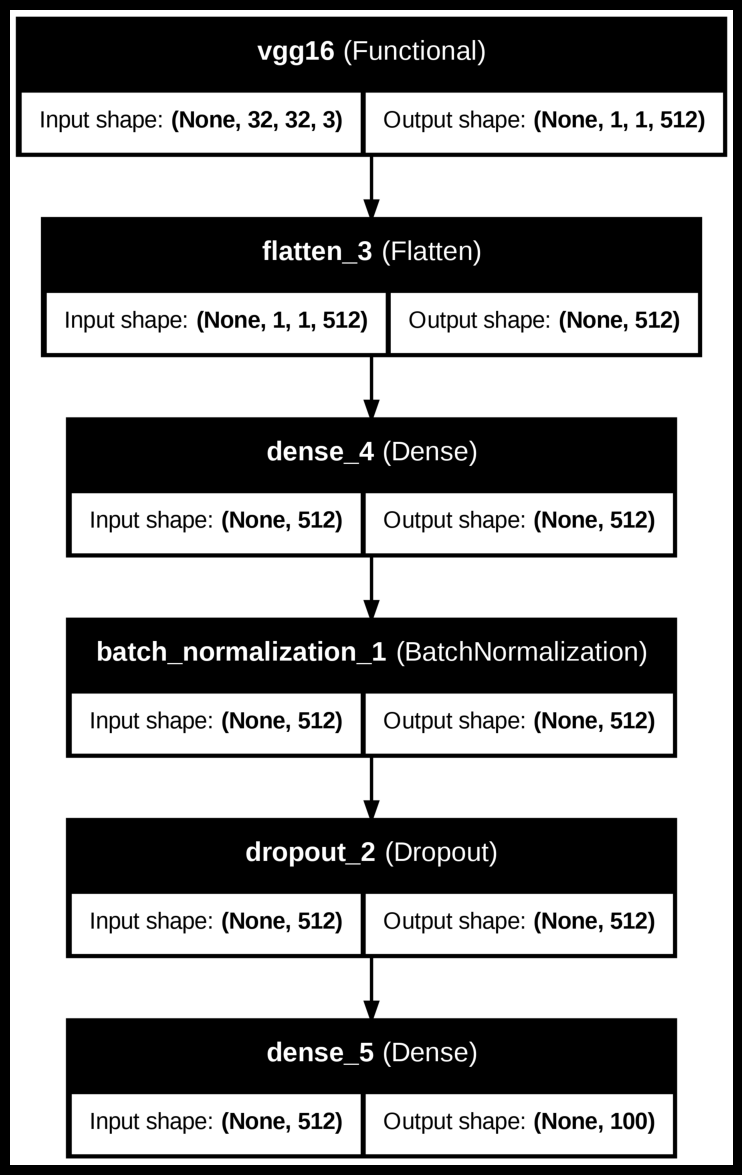

In [ ]:
plt.figure(figsize=(10, 10))
plot_model(model, to_file='alexnet_custom_fc_model.png', show_shapes=True, show_layer_names=True, dpi=300)
img = mpimg.imread('alexnet_custom_fc_model.png')
plt.figure(figsize=(15, 15))
plt.imshow(img)
plt.axis('off')
plt.show()

In [ ]:
datagen = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)
datagen.fit(X_train)

In [ ]:
start_time_pretrained = time.time()
history = model.fit(datagen.flow(X_train, y_train, batch_size=64),
                    epochs=20,
                    validation_data=(X_test, y_test))

pretrained_inference_time = time.time() - start_time_pretrained

Epoch 1/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 97s 66ms/step - accuracy: 0.0706 - loss: 4.4892 - val_accuracy: 0.1992 - val_loss: 3.5115
Epoch 2/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 42s 53ms/step - accuracy: 0.2312 - loss: 3.3296 - val_accuracy: 0.3473 - val_loss: 2.7736
Epoch 3/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 41s 52ms/step - accuracy: 0.3130 - loss: 2.8945 - val_accuracy: 0.3967 - val_loss: 2.5036
Epoch 4/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 41s 52ms/step - accuracy: 0.3689 - loss: 2.6450 - val_accuracy: 0.4510 - val_loss: 2.2569
Epoch 5/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 41s 52ms/step - accuracy: 0.3993 - loss: 2.4844 - val_accuracy: 0.4842 - val_loss: 2.1307
Epoch 6/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 41s 52ms/step - accuracy: 0.4358 - loss: 2.3298 - val_accuracy: 0.4749 - val_loss: 2.1998
Epoch 7/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 41s 52ms/step - accuracy: 0.4660 - loss: 2.2035 - val_accuracy: 0.5149 - val_loss: 1.9957
Epoch 8/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 41s 52ms/step - accuracy: 0.4866 - loss: 2.1187 - 

In [ ]:
pretrained_accuracy = model.evaluate(X_test, y_test, verbose=1)[1] * 100

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.6283 - loss: 1.5981


In [ ]:
print(f"Model: VGG16 (Pretrained Features, Custom FC Layers) CIFAR100")
print(f"Accuracy: {pretrained_accuracy:.2f}%")
print(f"Inference Time: {pretrained_inference_time:.4f} seconds")

Model: VGG16 (Pretrained Features, Custom FC Layers) CIFAR100
Accuracy: 61.89%
Inference Time: 872.9697 seconds


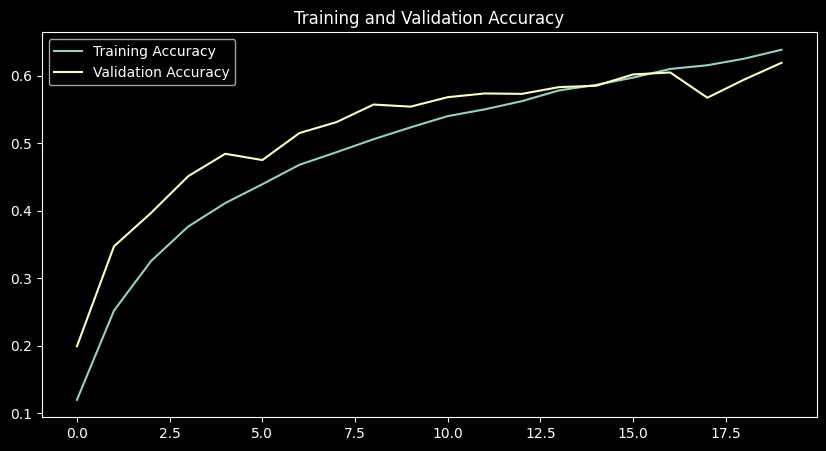

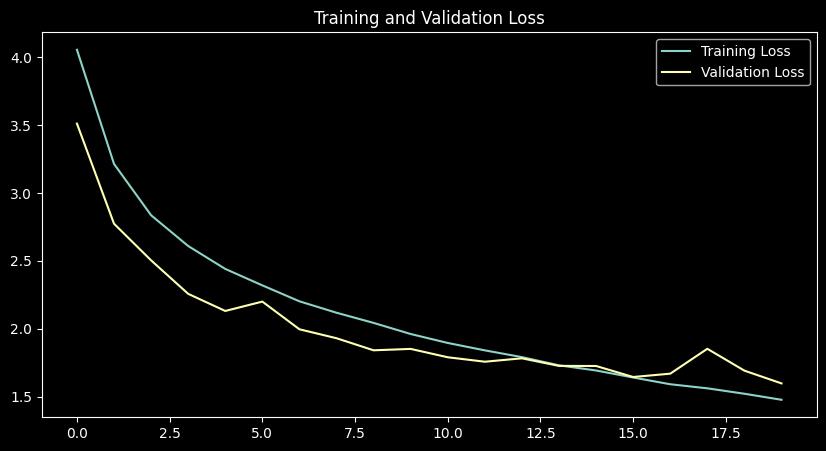

Model: VGG16 (Pretrained Features, Custom FC Layers) CIFAR100
Accuracy: 61.89%
Inference Time: 872.9697 seconds


In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()


plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()


print(f"Model: VGG16 (Pretrained Features, Custom FC Layers) CIFAR100")
print(f"Accuracy: {pretrained_accuracy:.2f}%")
print(f"Inference Time: {pretrained_inference_time:.4f} seconds")

<h3>AlexNet</h3>

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
import torchvision.datasets as datasets
import torchvision.models as models
from torch.utils.data import DataLoader
import sys


device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cuda


In [2]:
data_transforms = {
    'train': transforms.Compose([
        transforms.Resize(224),
        transforms.RandomHorizontalFlip(),
        transforms.RandomCrop(224, padding=4),
        transforms.ToTensor(),
        transforms.Normalize((0.4914, 0.4822, 0.4465), (0.247, 0.243, 0.261))
    ]),
    'test': transforms.Compose([
        transforms.Resize(224),
        transforms.ToTensor(),
        transforms.Normalize((0.4914, 0.4822, 0.4465), (0.247, 0.243, 0.261))
    ])
}

train_dataset = datasets.CIFAR10(root='./data', train=True, download=True, transform=data_transforms['train'])
test_dataset = datasets.CIFAR10(root='./data', train=False, download=True, transform=data_transforms['test'])

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True, num_workers=2)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False, num_workers=2)

100%|██████████| 170M/170M [01:51<00:00, 1.53MB/s]


In [3]:
model = models.alexnet(pretrained=True)
model.classifier[6] = nn.Linear(model.classifier[6].in_features, 10)
model = model.to(device)

/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/alexnet-owt-7be5be79.pth" to /root/.cache/torch/hub/checkpoints/alexnet-owt-7be5be79.pth
100%|██████████| 233M/233M [00:01<00:00, 180MB/s]


In [4]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

num_epochs = 10
train_loss_list = []
train_accuracy_list = []

In [5]:
import sys
import matplotlib.pyplot as plt

train_loss_list = []
train_accuracy_list = []
val_loss_list = []
val_accuracy_list = []

print("Starting Training...")
print("=" * 50)

for epoch in range(1, num_epochs + 1):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0

    print(f"\nEpoch [{epoch}/{num_epochs}]")
    print("-" * 50)

    for step, (inputs, labels) in enumerate(train_loader, 1):
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = outputs.max(1)
        total += labels.size(0)
        correct += predicted.eq(labels).sum().item()

        step_loss = loss.item()
        step_accuracy = 100. * correct / total

        sys.stdout.write(
            f"\rBatch [{step}/{len(train_loader)}], Loss: {step_loss:.4f}, Cumulative Accuracy: {step_accuracy:.2f}%"
        )
        sys.stdout.flush()

    train_loss = running_loss / len(train_loader)
    train_accuracy = 100. * correct / total
    train_loss_list.append(train_loss)
    train_accuracy_list.append(train_accuracy)

    model.eval()
    val_loss = 0.0
    correct = 0
    total = 0

    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)

            val_loss += loss.item()
            _, predicted = outputs.max(1)
            total += labels.size(0)
            correct += predicted.eq(labels).sum().item()

    val_loss /= len(test_loader)
    val_accuracy = 100. * correct / total
    val_loss_list.append(val_loss)
    val_accuracy_list.append(val_accuracy)

    print(f"\nEpoch Summary [{epoch}/{num_epochs}], "
          f"Train Loss: {train_loss:.4f}, Train Accuracy: {train_accuracy:.2f}%, "
          f"Validation Loss: {val_loss:.4f}, Validation Accuracy: {val_accuracy:.2f}%")
    print("=" * 50)

print("Training Complete!")

Starting Training...

Epoch [1/10]
--------------------------------------------------
Batch [782/782], Loss: 1.8801, Cumulative Accuracy: 32.63%
Epoch Summary [1/10], Train Loss: 1.7917, Train Accuracy: 32.63%, Validation Loss: 1.4548, Validation Accuracy: 48.66%

Epoch [2/10]
--------------------------------------------------
Batch [782/782], Loss: 1.0947, Cumulative Accuracy: 53.07%
Epoch Summary [2/10], Train Loss: 1.3102, Train Accuracy: 53.07%, Validation Loss: 1.0753, Validation Accuracy: 61.64%

Epoch [3/10]
--------------------------------------------------
Batch [782/782], Loss: 1.4474, Cumulative Accuracy: 61.55%
Epoch Summary [3/10], Train Loss: 1.1057, Train Accuracy: 61.55%, Validation Loss: 1.0441, Validation Accuracy: 63.81%

Epoch [4/10]
--------------------------------------------------
Batch [782/782], Loss: 1.2873, Cumulative Accuracy: 65.26%
Epoch Summary [4/10], Train Loss: 1.0011, Train Accuracy: 65.26%, Validation Loss: 0.9294, Validation Accuracy: 68.39%

Epoch 

In [6]:
model.eval()
correct = 0
total = 0

with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        _, predicted = outputs.max(1)
        total += labels.size(0)
        correct += predicted.eq(labels).sum().item()

test_accuracy = 100. * correct / total
print(f"Test Accuracy: {test_accuracy:.2f}%")

Test Accuracy: 74.67%


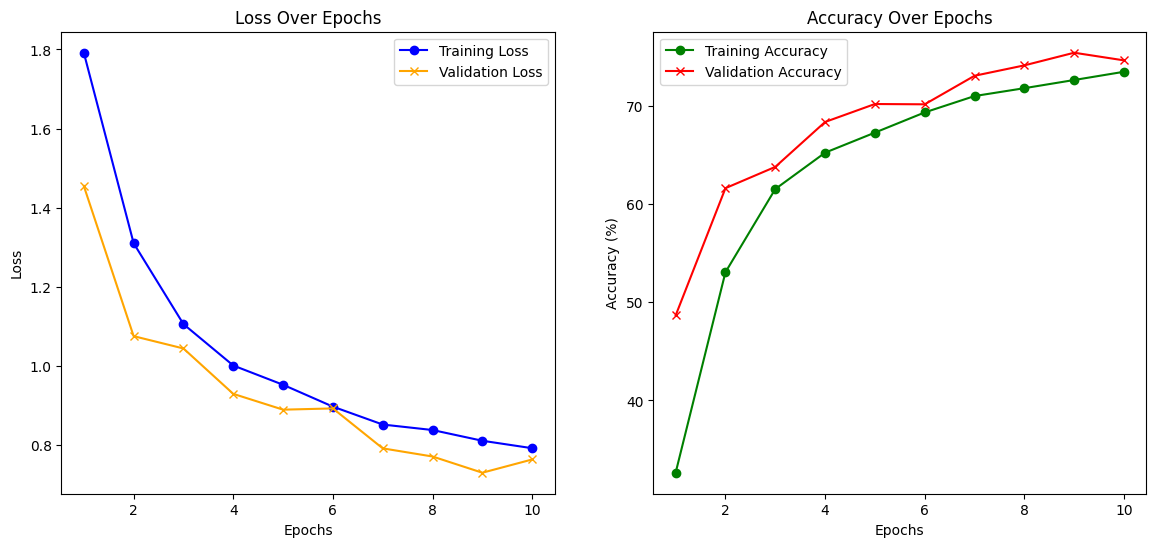

In [7]:
epochs_range = range(1, num_epochs + 1)

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, train_loss_list, label='Training Loss', color='blue', marker='o')
plt.plot(epochs_range, val_loss_list, label='Validation Loss', color='orange', marker='x')
plt.title('Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs_range, train_accuracy_list, label='Training Accuracy', color='green', marker='o')
plt.plot(epochs_range, val_accuracy_list, label='Validation Accuracy', color='red', marker='x')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.legend()

plt.show()

o	Adjusting brightness and contrast

o	Sharpening images

o	Removing noise from images

o	Enhancing color in images

o	Image resizing and scaling

o	Inverse Transform

o	Equalizing histograms

o	Super-resolution

o	Color correction


In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.restoration import denoise_tv_chambolle

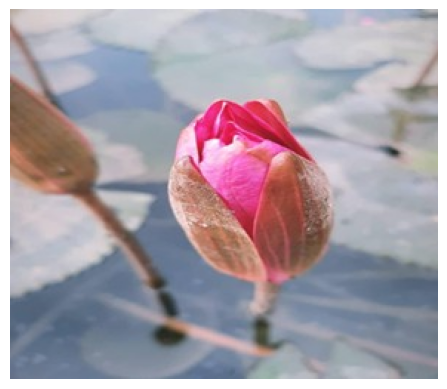

In [5]:
image_path = "/content/Flower.jpg"
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)
plt.axis('off')
plt.show()

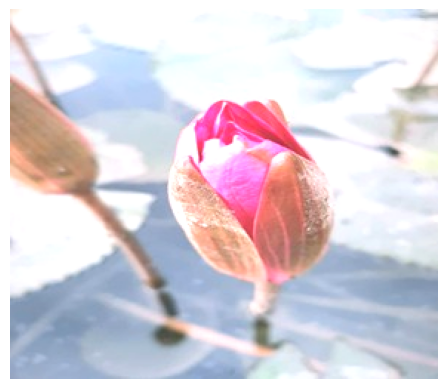

In [6]:
alpha = 1.2
beta = 30
image_bc = cv2.convertScaleAbs(image, alpha=alpha, beta=beta)
plt.imshow(image_bc)
plt.axis('off')
plt.show()

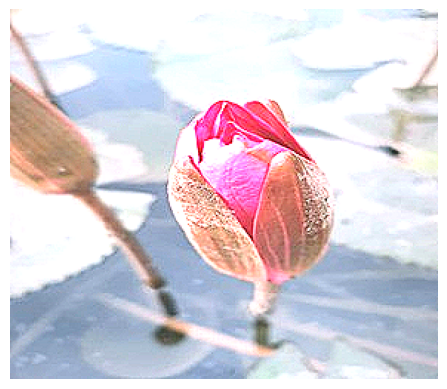

In [7]:
kernel = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])
image_sharp = cv2.filter2D(image_bc, -1, kernel)
plt.imshow(image_sharp)
plt.axis('off')
plt.show()

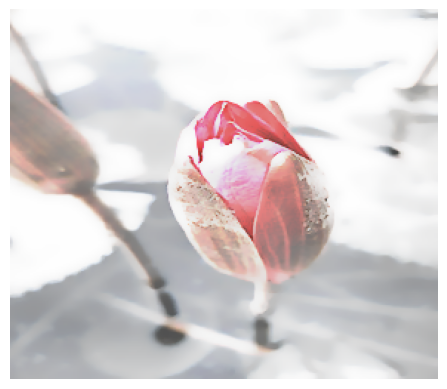

In [10]:
image_denoise = denoise_tv_chambolle(image_sharp, weight=0.1)
image_denoise = (image_denoise * 255).astype(np.uint8)
plt.imshow(image_denoise)
plt.axis('off')
plt.show()

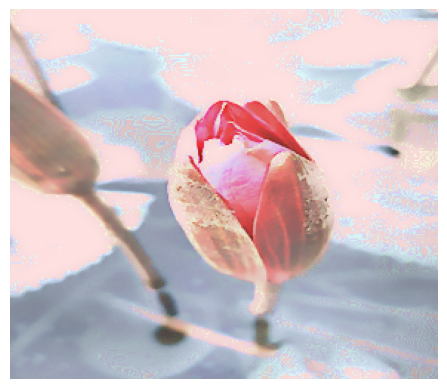

In [11]:
hsv = cv2.cvtColor(image_denoise, cv2.COLOR_RGB2HSV)
hsv[:, :, 1] = cv2.add(hsv[:, :, 1], 30)
image_color_enhanced = cv2.cvtColor(hsv, cv2.COLOR_HSV2RGB)
plt.imshow(image_color_enhanced)
plt.axis('off')
plt.show()

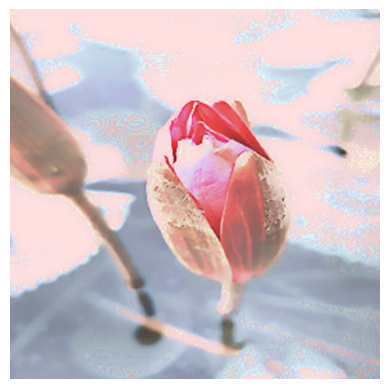

In [12]:
image_resized = cv2.resize(image_color_enhanced, (512, 512), interpolation=cv2.INTER_CUBIC)
plt.imshow(image_resized)
plt.axis('off')
plt.show()

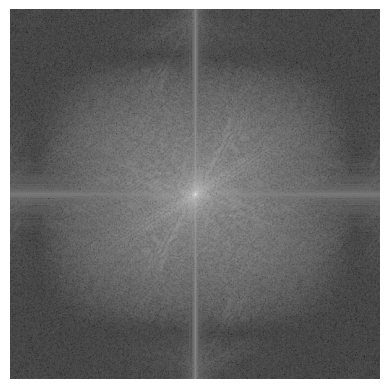

In [13]:
gray = cv2.cvtColor(image_resized, cv2.COLOR_RGB2GRAY)
f = np.fft.fft2(gray)
fshift = np.fft.fftshift(f)
magnitude_spectrum = 20 * np.log(np.abs(fshift))
plt.imshow(magnitude_spectrum, cmap='gray')
plt.axis('off')
plt.show()

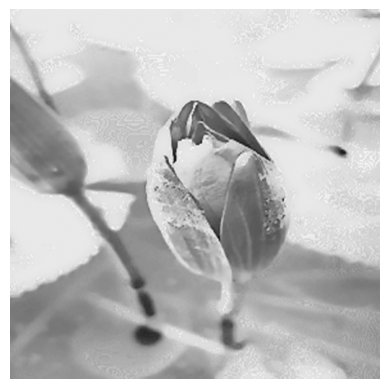

In [14]:
ishift = np.fft.ifftshift(fshift)
image_inverse = np.fft.ifft2(ishift)
image_inverse = np.abs(image_inverse)
image_inverse = cv2.normalize(image_inverse, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)
plt.imshow(image_inverse, cmap='gray')
plt.axis('off')
plt.show()

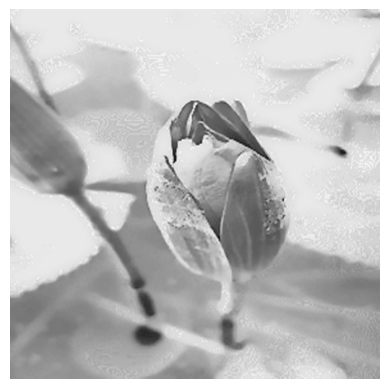

In [15]:
image_inverse_rgb = cv2.cvtColor(image_inverse, cv2.COLOR_GRAY2RGB)
plt.imshow(image_inverse_rgb)
plt.axis('off')
plt.show()

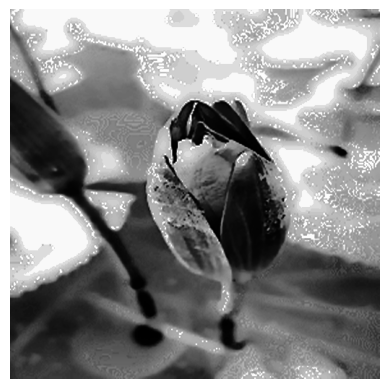

In [17]:
image_yuv = cv2.cvtColor(image_inverse_rgb, cv2.COLOR_RGB2YUV)
image_yuv[:, :, 0] = cv2.equalizeHist(image_yuv[:, :, 0])
image_hist_eq = cv2.cvtColor(image_yuv, cv2.COLOR_YUV2RGB)
plt.imshow(image_hist_eq)
plt.axis('off')
plt.show()

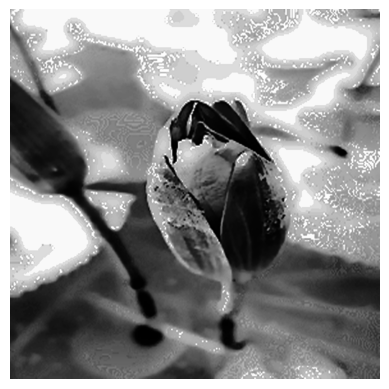

In [18]:
image_superres = cv2.resize(image_hist_eq, (1024, 1024), interpolation=cv2.INTER_CUBIC)
plt.imshow(image_superres)
plt.axis('off')
plt.show()

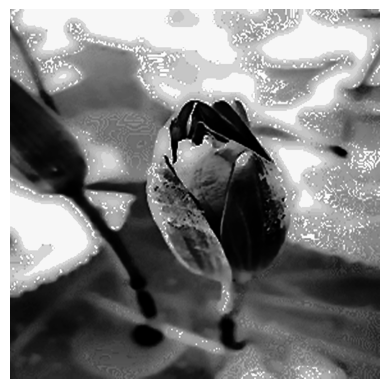

In [19]:
gamma = 1.2
image_corrected = np.power(image_superres / 255.0, gamma)
image_corrected = (image_corrected * 255).astype(np.uint8)
plt.imshow(image_corrected)
plt.axis('off')
plt.show()

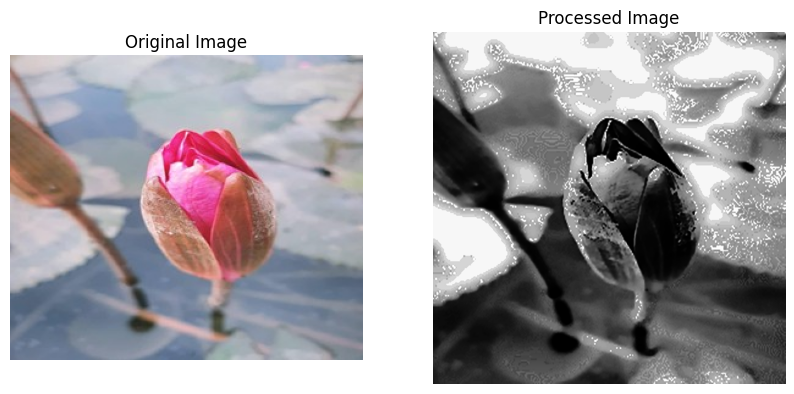

In [20]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(image)
axes[0].set_title("Original Image")
axes[0].axis("off")

axes[1].imshow(image_corrected)
axes[1].set_title("Processed Image")
axes[1].axis("off")

plt.show()

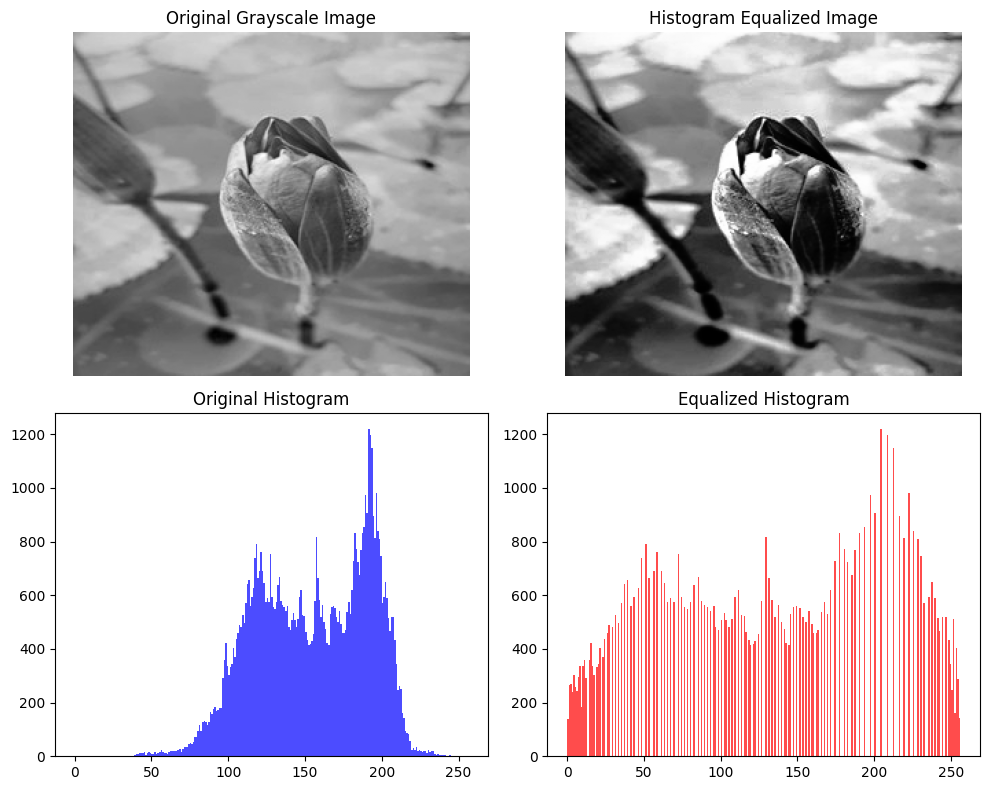

In [22]:
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

hist_eq = cv2.equalizeHist(gray)

fig, axes = plt.subplots(2, 2, figsize=(10, 8))

axes[0, 0].imshow(gray, cmap='gray')
axes[0, 0].set_title("Original Grayscale Image")
axes[0, 0].axis("off")

axes[0, 1].imshow(hist_eq, cmap='gray')
axes[0, 1].set_title("Histogram Equalized Image")
axes[0, 1].axis("off")

axes[1, 0].hist(gray.ravel(), bins=256, range=[0, 256], color='blue', alpha=0.7)
axes[1, 0].set_title("Original Histogram")

axes[1, 1].hist(hist_eq.ravel(), bins=256, range=[0, 256], color='red', alpha=0.7)
axes[1, 1].set_title("Equalized Histogram")

plt.tight_layout()
plt.show()